In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy


In [380]:

# Supongamos que 'df' es un DataFrame con las columnas 'Altura', 'Mean', y 'Error'
mat_data = scipy.io.loadmat('datos.mat')  # Reemplaza con la ruta a tu archivo .mat
Altura = np.array(mat_data["Altura"])
temperaturas = np.array(mat_data["T_medidas"])
print(temperaturas.shape)

np_mean = []
np_error = []
for i in range(Altura.size):
    np_mean.append(np.mean(temperaturas[:,i]))
    np_error.append(np.std(temperaturas[:,i]))

mean = np.array(np_mean)
error = np.array(np_error)
print(Altura.shape)
print(mean.shape)
print(error.shape)

(10, 33)
(1, 33)
(33,)
(33,)


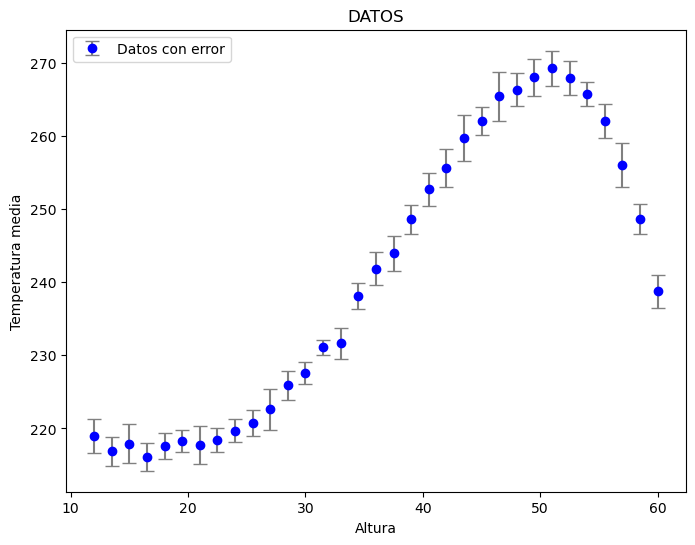

In [381]:
plt.figure(figsize=(8, 6))
plt.errorbar(Altura.T, mean.T, yerr=error, fmt='o', color='blue', ecolor='gray', capsize=5, label='Datos con error')

# Etiquetas y título
plt.xlabel('Altura')
plt.ylabel('Temperatura media')
plt.title('DATOS')
plt.legend()

In [382]:

values = np.random.uniform(0, 100, (1, 5))
values = np.array([[280, 5.91, -12.18, 12.01, 2.521]])

x = Altura
y = mean
h_mean = (x * mean).sum() / mean.sum()
def f(values):
    y_pred = values[0,0] + values[0,1] * (x - h_mean) + values[0,2] * (x - h_mean)**2 + values[0,3] * (x - h_mean)**3 + values[0,4] * (x - h_mean)**4
    return y_pred
y_pred = f(values)
def mse(x, y, y_pred):
    return 1/x.size * np.sum((y - y_pred)**2)
error_mse = mse(x, y, y_pred)
error_mse

93108158482.04579

WoW ! Como se puede ver, estos valores aleatorios dan lugar a un error enorme, hagamos un descenso por gradiente para minimizarlo.

In [383]:
def gradient(y_pred, y, x, h_mean):
    gradient = []
    for i in range(5):
        grad = (-2/x.size) * np.sum((y - y_pred) * (x - h_mean)**i)
        gradient.append(grad)
    return np.array(gradient)
decay_rate = 1.05
learning_rate = 1e-11
mse_list = []
interations = [i for i in range(100000)]
for iteration in interations:
    mse_list.append(mse(x,y,y_pred))
    y_pred = f(values)
    grad = gradient(y_pred, y, x, h_mean)
    values -= learning_rate * grad
    if iteration == 10000:
        learning_rate *= decay_rate
mse_list = np.array(mse_list)
print(f"MSE = {mse(x,y,y_pred)}")

MSE = 874878.4966222707


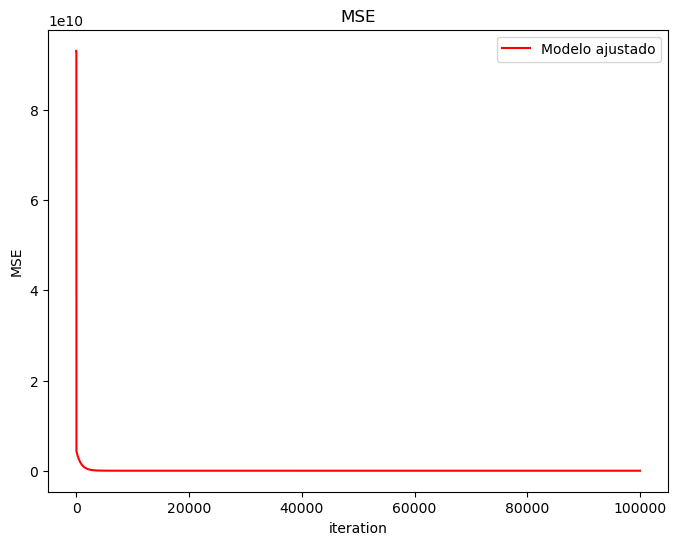

In [384]:
plt.figure(figsize=(8, 6))
plt.plot(interations, mse_list, color='red', label='Modelo ajustado')

# Etiquetas y título
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.title('MSE')
plt.legend()

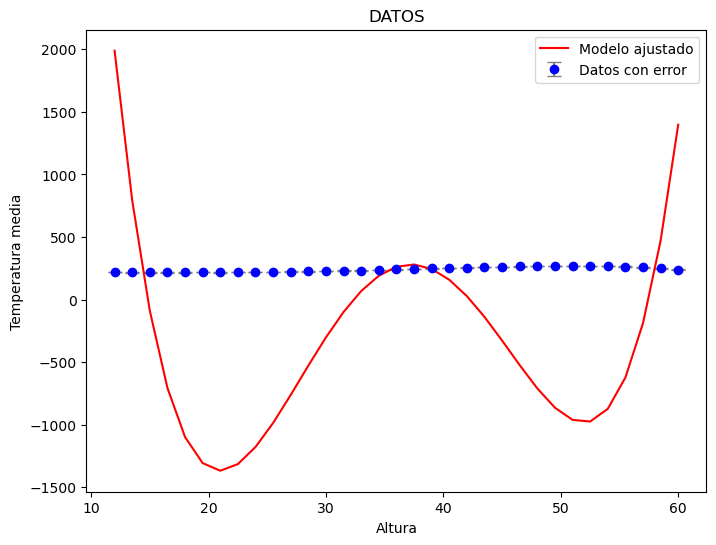

In [385]:
plt.figure(figsize=(8, 6))
plt.errorbar(Altura.T, mean.T, yerr=error, fmt='o', color='blue', ecolor='gray', capsize=5, label='Datos con error')
plt.plot(x.T, y_pred.T, color='red', label='Modelo ajustado')

# Etiquetas y título
plt.xlabel('Altura')
plt.ylabel('Temperatura media')
plt.title('DATOS')
plt.legend()

In [387]:
epochs = 1000
for epoch in range(epochs):
    # Shuffle the data
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    
    for idx in indices:
        x = x[idx]
        y = y[idx]
        x = x - h_mean
        
        # Calcular la predicción y el gradiente para el punto actual
        y_pred = f(values, x, h_mean)
        grad = gradient(y_pred, y, x, h_mean, values)
        
        # Actualizar los parámetros
        values -= learning_rate * grad

TypeError: f() takes 1 positional argument but 3 were given